In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm

import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# description of the dataset
#The dataset include s training set and a test set of images of dogs. 
#Each image has a filename that is its unique id. 
#The dataset comprises 120 breeds of dogs. 
#The goal of the competition is to create a classifier capable of determining a dog's breed from a photo. 

#Descriptions of inputs:
#    train.zip - the training set (10222 images) , you are provided the breed for these dogs
#    test.zip - the test set (10357 images) , you must predict the probability of each breed for each image
#    sample_submission.csv - a sample submission file in the correct format
#    labels.csv - the breeds for the images in the train set


# import data
csv_train = pd.read_csv('../input/labels.csv')
csv_test = pd.read_csv('../input/sample_submission.csv')

# read training CSV: for each ids (10222 rows) the associated breed label.
csv_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [3]:
# read test csv: for each ids (10357 rows) the probabilities to each breed (120 columns)
csv_test.head(10) 


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5,00225dcd3e4d2410dd53239f95c0352f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
6,002c2a3117c2193b4d26400ce431eebd,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7,002c58d413a521ae8d1a5daeb35fc803,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
8,002f80396f1e3db687c5932d7978b196,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
9,0036c6bcec6031be9e62a257b1c3c442,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [4]:
# Generate Labels
targets_series = pd.Series(csv_train['breed'])
#print(targets_series)
one_hot = pd.get_dummies(targets_series, sparse = True)
labels = np.asarray(one_hot) # list of (10222)  one-host labels.   labels[0] = 000...0...1..000 (120)
n_check = random.randint(0, len(labels)-1)
print(csv_train['breed'][n_check], 'is encoded as', ''.join((str(i) for i in labels[n_check])))

norwegian_elkhound is encoded as 000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000


In [5]:
im_size = 100 # size in pixel of the transformed images

# train set contains 10222 images of dogs
x_train = [] # contains the images
y_train = [] # contains the label of the images


In [6]:
for id, (f, breed) in enumerate(tqdm(csv_train.values)):
    img = cv2.imread('../input/train/{}.jpg'.format(f))
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(labels[id])


100%|██████████| 10222/10222 [00:24<00:00, 417.54it/s]


label: 000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


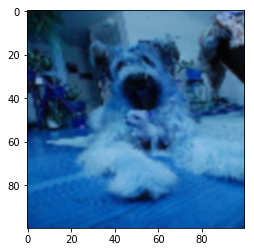

In [7]:
# check train
n_check = random.randint(0, len(y_train)-1)
print('label:', ''.join((str(i) for i in y_train[n_check])))
plt.imshow(x_train[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [8]:
# test set contains 10357 images
x_test = []

for f in tqdm(csv_test['id'].values):
    img = cv2.imread('../input/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|██████████| 10357/10357 [00:24<00:00, 431.17it/s]


**TODO:** add data augmentation, rotate/zoom the photo to ingrease the data.

In [9]:
# build np array and normalise them
x_train_raw = np.array(x_train, np.float32) / 255.
y_train_raw = np.array(y_train, np.uint8)
x_test_raw  = np.array(x_test, np.float32) / 255.

In [10]:
print("x_train shape:", x_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("x_test shape:", x_test_raw.shape)

x_train shape: (10222, 100, 100, 3)
y_train shape: (10222, 120)
x_test shape: (10357, 100, 100, 3)


In [11]:
# 120 number of classes (breed of the dogs)
num_class = y_train_raw.shape[1]

**TODO:** Improuve the split by ensure that an equal percentage of breed are in train and validation.

In [12]:
#  Split arrays  into random train and test subsets
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.2, random_state=42)

In [28]:
# Insert data into tensors
# Assume that each row of `features` corresponds to the same row as `labels`.
assert X_train.shape[0] == Y_train.shape[0]

X_train_placeholder = tf.placeholder(X_train.dtype, X_train.shape)
Y_train_placeholder = tf.placeholder(Y_train.dtype, Y_train.shape)

dataset = tf.data.Dataset.from_tensor_slices((X_train_placeholder, Y_train_placeholder))

In [14]:

tot_px =  im_size * im_size
# store the tensor of one input image (2oo x 2oo pixel), [None] determine the chunck size
# X = tf.placeholder(tf.float32, [None, 28, 28, 1])
X = tf.placeholder(tf.float32,[None, im_size,im_size,1]) #tot_pixels])
# weigths to be learnt
W = tf.Variable(tf.zeros([tot_pixels,num_class]))
# baias to be added 
b = tf.Variable(tf.zeros([num_class]))
                
# init = tf.initialize_all_variables()
init = tf.global_variables_initializer()

In [15]:
# define the MODEL
#  (th.reshape() flatten the images into a vector of 784 pixels)
Y = tf.nn.softmax(tf.matmul(tf.reshape(X,[-1,tot_px]), W) + b)  #X.W +b

# placehlder for correct answer
Y_ = tf.placeholder(tf.float32,[None,num_class]) # one-shot encoded


# loss function: cross_entropy = - sum(correctAnswer * learnValue)
cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))

# calculate the number of correct answer and the accuracy
#          tf.equal() to check if our prediction matches the truth
#          tf.argmax() gives you the index of the highest entry in a tensor along some axis.
is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1)) 
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [16]:
# trainig step
optmizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optmizer.minimize(cross_entropy) # the optimizer should minimize the cross entropy loss function

In [ ]:




## run the model
sess  = tf.Session()
sess.run(init) 

BATCH_SIZE = 100

for i in range(1000):
  #load batch images and correct answer
  #batch_X, batch_Y =   # mnist.train.next_batch(100) 
  batched_dataset = dataset.batch(4)
  train_data = {X:batch_X, Y_:batch_Y}

  # train
  sess.run(train_step, feed_dict=train_data)
  
  # success?
  a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
  #print("Train: Iter {0} - Accuracy: {1}, Cross entropy: {2}".format(i,a,c))
  
  # ask for accuracy in test data (10000 images)
  test_data = {X:mnist.test.images,  Y_:mnist.test.labels}
  a,c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
  
  #print("Test: Iter {0} - Accuracy: {1}, Cross entropy: {2}".format(i,a,c))
print("Iter {0} - Accuracy: {1}, Cross entropy: {2}".format(i,a,c))

In [35]:
#import generator
# Assume that each row of `features` corresponds to the same row as `labels`.
assert x_train_raw.shape[0] == y_train_raw.shape[0]

features_placeholder = tf.placeholder(x_train_raw.dtype, x_train_raw.shape)
labels_placeholder = tf.placeholder(y_train_raw.dtype, y_train_raw.shape)

dataset = tf.data.Dataset.from_tensor_slices((features_placeholder, labels_placeholder))

dataset = dataset.batch(32)
dataset = dataset.repeat(100)


  # that feature; `labels` is a batch of labels.
for i in range(100):

    f =  iterator.get_next()
    

NameError: name 'iterator' is not defined